# Second EDA notebook

### Import useful libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

### Import data

In [2]:
cmm_data = pd.read_csv('/home/ruggiec/Downloads/pharmacy_tx.csv')

In [3]:
cmm_data_no_dups = cmm_data.drop_duplicates()

### Create Train/Test split

In [4]:
cmm_train, cmm_test = train_test_split(cmm_data_no_dups, shuffle=True, 
                             random_state= 614, test_size=0.2)

### Some basic feature engineering

The following 2 functions are used to split the drug name and create a column for generics

In [5]:
def is_it_generic(text):
    if text.split()[0] == 'generic':
        return 1
    else:
        return 0

In [6]:
def drug_name(text):
    return text.split()[1]

In [7]:
cmm_train['generic'] = cmm_train.drug.apply(is_it_generic)

In [8]:
cmm_train['name'] = cmm_train['drug'].apply(drug_name)

In [9]:
cmm_train['private'] = cmm_train.group.isna().astype(int)

In [10]:
cmm_train['popularity'] = cmm_train.groupby('name')[['tx_date']].transform('count')

In [11]:
cmm_train['rejected'] = cmm_train['rejected'].astype(int)

In [12]:
cmm_train['rejected_count'] = cmm_train.groupby('name')['rejected'].transform('sum')

In [13]:
cmm_train.head()

,tx_date,pharmacy,diagnosis,drug,bin,pcn,group,rejected,patient_pay,generic,name,private,popularity,rejected_count
3962160,2022-04-23,Pharmacy #29,M31.63,branded mamate,322463,3O71UTS,NaN,0,25.75,0,mamate,1,23539,4480
1161541,2022-02-06,Pharmacy #7,Z20.23,branded vivafastat,725700,327CKV,IOEAN1DWVV3Y,0,180.52,0,vivafastat,0,43263,14072
10643305,2022-10-12,Pharmacy #4,U41.19,generic foxivelule,322463,3O71UTS,NaN,0,12.22,1,foxivelule,1,367822,0
10629491,2022-10-11,Pharmacy #31,K87.68,generic ribosatharin,664344,YFVIA,AJK5MZ25T9IA,0,12.37,1,ribosatharin,0,121908,8960
10928718,2022-10-18,Pharmacy #6,G99.93,generic simarol,96934,S76J7V6,NaN,0,13.93,1,simarol,1,144501,7380


In [14]:
cmm_train.groupby('name')['patient_pay'].mean()

name
antimab            18.714376
bovirol            11.083089
brede              11.266803
choxestamenium     84.639381
cibroniudosin      13.129981
                     ...    
tovane             11.165066
tricatripride      24.018239
tugesutin         109.330676
vivafastat        101.869129
vocopirin          16.192506
Name: patient_pay, Length: 77, dtype: float64

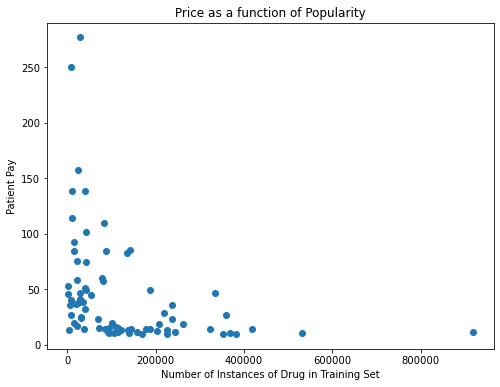

In [73]:
plt.figure(figsize=(8,6))

plt.scatter(cmm_train.groupby('name')['popularity'].mean(), 
            cmm_train.groupby('name')['patient_pay'].mean())
plt.title('Price as a function of Popularity')
plt.xlabel('Number of Instances of Drug in Training Set')
plt.ylabel('Patient Pay')

plt.show()

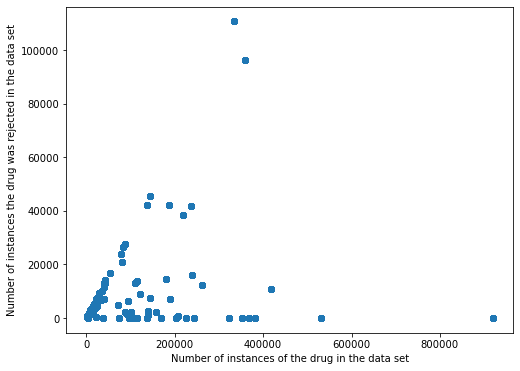

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(cmm_train[cmm_train['rejected']==0]['popularity'], 
            cmm_train[cmm_train['rejected']==0]['rejected_count'])
plt.xlabel('Number of instances of the drug in the data set')
plt.ylabel('Number of instances the drug was rejected in the data set')
plt.show()

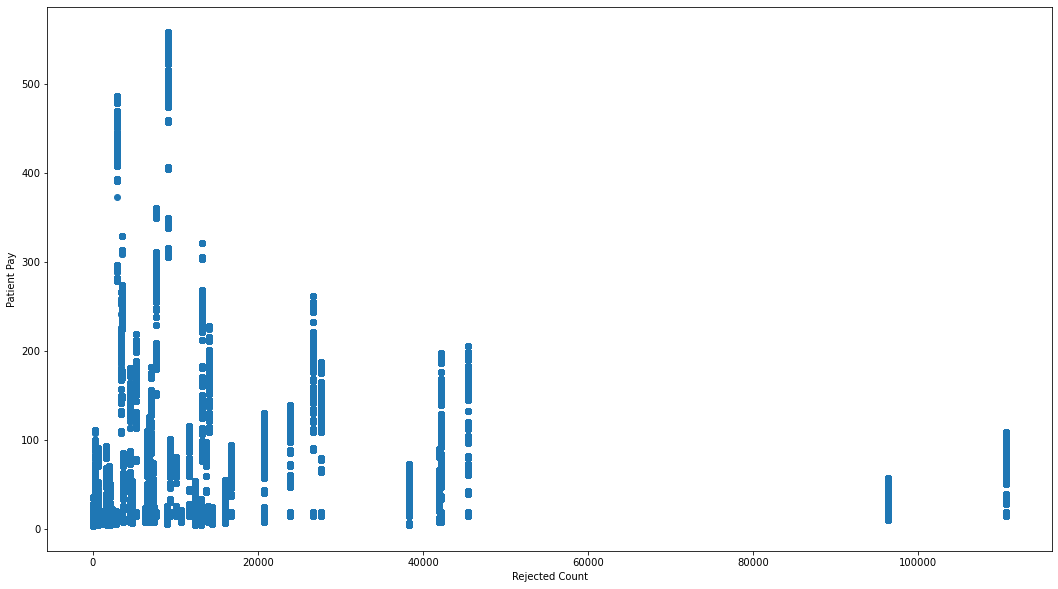

In [58]:
plt.figure(figsize=(18, 10))
plt.scatter(cmm_train[cmm_train['rejected']==0]['rejected_count'], 
            cmm_train[cmm_train['rejected']==0]['patient_pay'])
plt.xlabel('Rejected Count')
plt.ylabel('Patient Pay')
plt.show()

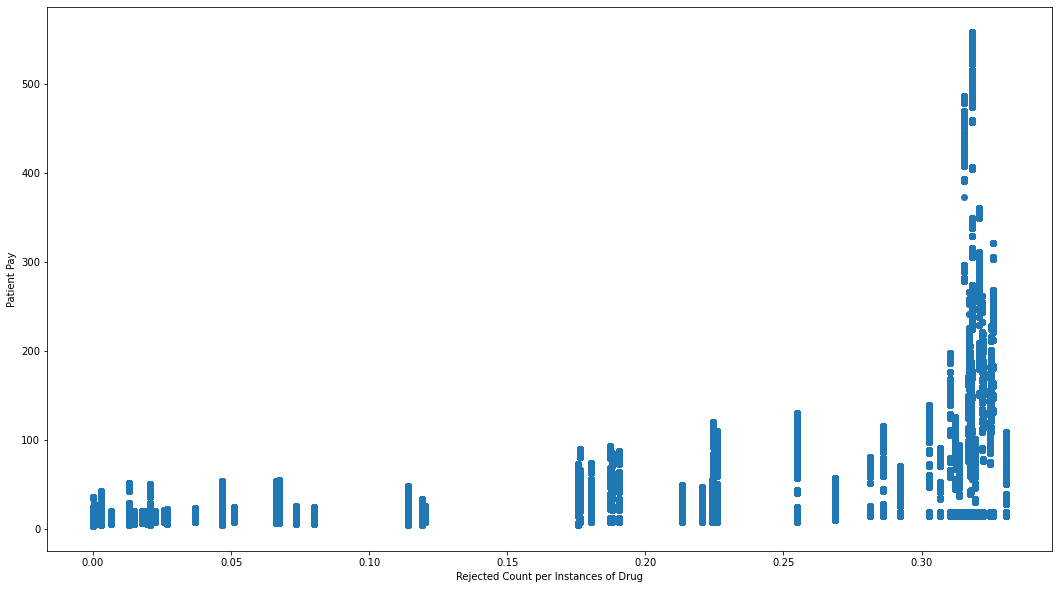

In [62]:
plt.figure(figsize=(18, 10))
plt.scatter(cmm_train[cmm_train['rejected']==0]['rejected_count']/cmm_train[cmm_train['rejected']==0]['popularity'], 
            cmm_train[cmm_train['rejected']==0]['patient_pay'])
plt.xlabel('Rejected Count per Instances of Drug')
plt.ylabel('Patient Pay')
plt.show()

It appears that drugs with higher rejection rates show higher prices and higher price variances.

In [20]:
cmm_train['log_pay'] = cmm_train['patient_pay'].apply(np.log)

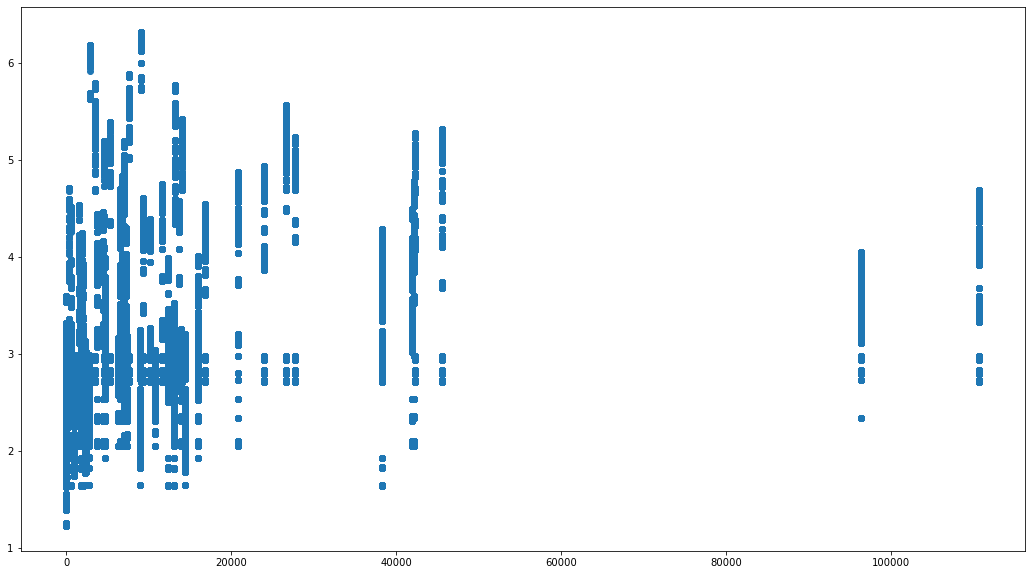

In [22]:
plt.figure(figsize=(18, 10))
plt.scatter(cmm_train[cmm_train['rejected']==0]['rejected_count'], 
            cmm_train[cmm_train['rejected']==0]['log_pay'])
plt.show()

In [46]:
cmm_train[cmm_train['rejected']==0].groupby('name')['patient_pay'].mean().sort_values(ascending=False)

name
monemodiase        406.017504
pheromycin         365.326027
prefluflomycin     231.473897
flacelfatastat     205.191397
masonic            203.026510
                      ...    
foxivelule          10.150110
tanoclolol           9.957783
oxasoted             9.946199
gorol                9.902102
glycontazepelol      9.709958
Name: patient_pay, Length: 77, dtype: float64

In [42]:
cmm_train[cmm_train['name']=='monemodiase']['patient_pay'].describe()

count    28617.000000
mean       276.850108
std        239.237588
min          0.000000
25%          0.000000
50%        340.290000
75%        505.860000
max        557.930000
Name: patient_pay, dtype: float64

In [61]:
cmm_train[cmm_train['rejected']==0]['rejected_count']/cmm_train[cmm_train['rejected']==0]['popularity']

3962160     0.190322
1161541     0.325266
10643305    0.000000
10629491    0.073498
10928718    0.051072
              ...   
12168362    0.000000
12922697    0.025656
3518530     0.000000
9525850     0.006697
7587179     0.000000
Length: 9209785, dtype: float64

### Does Diagnosis affect Patient Pay

In [83]:
cmm_train['diagnosis'].value_counts()

I68.27    1208246
G99.93    1024008
K32.86     959199
Q85.91     571944
W50.87     549632
           ...   
G27.20         18
A22.87         17
X00.63         12
J65.04         11
N33.46         10
Name: diagnosis, Length: 133, dtype: int64

In [75]:
cmm_train.groupby('diagnosis')['patient_pay'].mean()

diagnosis
A00.82     14.332656
A13.39     18.455033
A14.01     34.832977
A22.87    181.077647
A45.07     18.532764
             ...    
Z25.06     68.906092
Z34.94     56.276311
Z66.42     83.732898
Z95.40     19.337362
Z98.86     19.536242
Name: patient_pay, Length: 133, dtype: float64

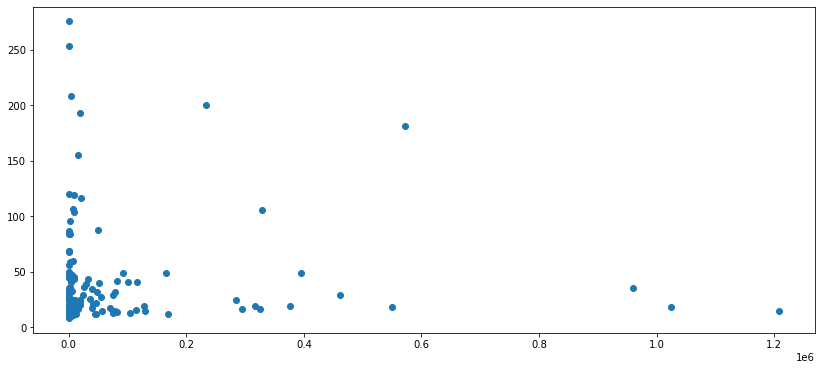

In [79]:
plt.figure(figsize=(14,6))

plt.scatter(cmm_train['diagnosis'].value_counts(), cmm_train.groupby('diagnosis')['patient_pay'].mean())

plt.show()

In [86]:
cmm_data.groupby('diagnosis')['patient_pay'].mean().sort_values(ascending=False)

diagnosis
U75.95    274.213221
W33.42    252.232470
P79.51    206.868277
C14.36    199.985830
H89.42    196.788889
             ...    
Y11.84     11.175200
M50.24     10.710000
U41.19     10.163504
P59.66     10.006370
Y08.66      8.205000
Name: patient_pay, Length: 133, dtype: float64

In [87]:
cmm_train[cmm_train['rejected']==0].groupby('diagnosis')['patient_pay'].mean().sort_values(ascending=False)

diagnosis
U75.95    404.231206
W33.42    372.473488
H89.42    313.458798
P79.51    309.574841
C14.36    291.321789
             ...    
Y11.84     11.189788
M50.24     10.599286
U41.19     10.191926
Y08.66     10.050000
P59.66     10.007263
Name: patient_pay, Length: 133, dtype: float64

### U75.95 is expensive 

In [93]:
cmm_train[cmm_train['diagnosis']=='U75.95']['patient_pay'].describe()

count    19195.000000
mean       275.412123
std        238.690995
min          0.000000
25%          0.000000
50%        339.070000
75%        505.680000
max        557.930000
Name: patient_pay, dtype: float64

In [95]:
cmm_train[cmm_train['diagnosis']=='U75.95']['drug'].value_counts()

branded monemodiase    19195
Name: drug, dtype: int64

#### only one drug is used to treat U75.95

In [94]:
cmm_train[cmm_train['diagnosis']=='P59.66']['patient_pay'].describe()

count    4761.000000
mean       10.007263
std         4.241589
min         5.240000
25%         6.340000
50%         8.510000
75%        12.740000
max        19.820000
Name: patient_pay, dtype: float64

In [96]:
cmm_train[cmm_train['diagnosis']=='P59.66']['drug'].value_counts()

branded oxasoted    2479
generic oxasoted    2282
Name: drug, dtype: int64

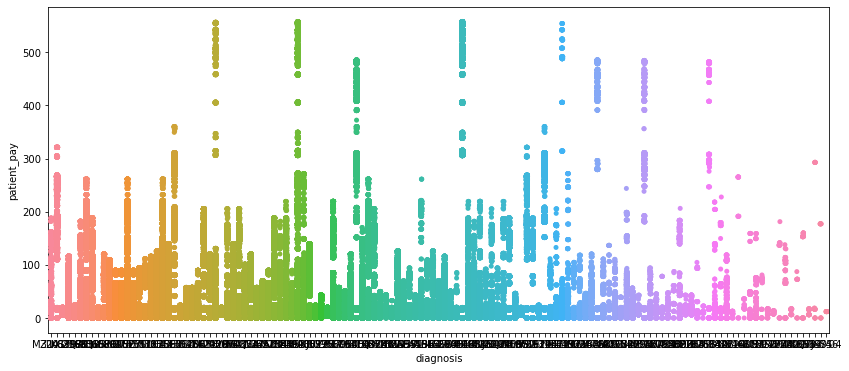

In [88]:
plt.figure(figsize=(14,6))

sns.stripplot(x='diagnosis', 
              y='patient_pay',
              data=cmm_train)

plt.show()

What determines the cost of an expensive drug like monemodiase

In [108]:
cmm_train[cmm_train['name']=='monemodiase']['diagnosis'].value_counts()

U75.95    19195
B45.03     8025
H33.06     1262
L07.00      135
Name: diagnosis, dtype: int64

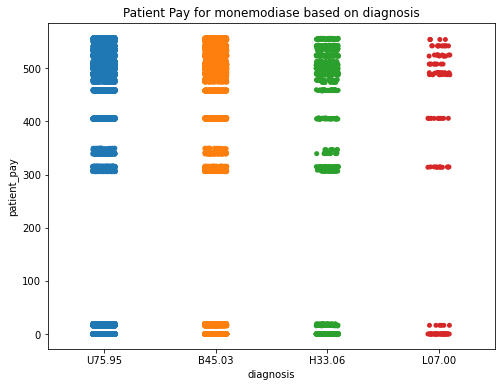

In [111]:
plt.figure(figsize=(8,6))


sns.stripplot(x='diagnosis', y='patient_pay', 
              data=cmm_train[cmm_train['name']=='monemodiase'])
plt.title('Patient Pay for monemodiase based on diagnosis')

plt.show()

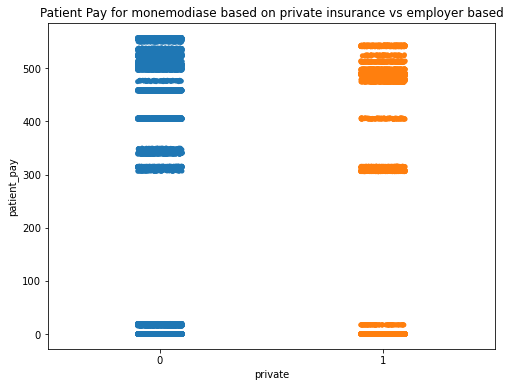

In [115]:
plt.figure(figsize=(8,6))


sns.stripplot(x='private', y='patient_pay', 
              data=cmm_train[cmm_train['name']=='monemodiase'])
plt.title('Patient Pay for monemodiase based on private insurance vs employer based')

plt.show()

In [127]:
cmm_train[(cmm_train['patient_pay']<100) & (cmm_train['name']=='monemodiase') & 
          (cmm_train['rejected']==0)]['bin'].value_counts()

322463    1801
664344     659
691847     230
96934      173
725700      53
Name: bin, dtype: int64

In [128]:
cmm_train[(cmm_train['name']=='monemodiase') & 
          (cmm_train['rejected']==0)]['bin'].value_counts()

664344    5233
322463    3219
725700    2985
691847    1919
96934     1366
757349    1255
571569    1221
539437     787
718350     483
956971     454
160389     374
756120     217
Name: bin, dtype: int64

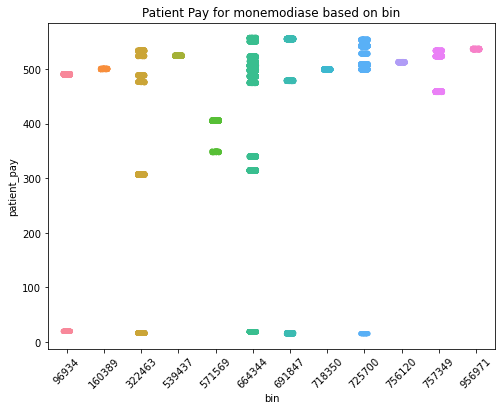

In [132]:
plt.figure(figsize=(8,6))


sns.stripplot(x='bin', y='patient_pay', 
              data=cmm_train[(cmm_train['name']=='monemodiase')&(cmm_train['rejected']==0)])
plt.title('Patient Pay for monemodiase based on bin')
plt.xticks(rotation=45)

plt.show()